<a href="https://colab.research.google.com/github/datadigger01/AI-Trade/blob/main/Tariff_hs_ramen_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pprint
import json


### xml을 DataFrame으로 변환하기 ###
from os import name
import xml.etree.ElementTree as et
import pandas as pd
import bs4
from lxml import html
from urllib.parse import urlencode, quote_plus, unquote

In [2]:
#Servicekey = "Ta+GkEF0ssmW1hDhEqXm5Xe2TWsM3pPycVRDIX9ejyt1GdQ/G8TkNhBRwJvnpHggECz6Kx5KBddps9oh9qjcPQ=="
#url = "http://apis.data.go.kr/1220000/nitemtrade/getNitemtradeList?strtYymm=202501&endYymm=202512&hsSgn=1902301010&numOfRows=1000&serviceKey=Ta%2BGkEF0ssmW1hDhEqXm5Xe2TWsM3pPycVRDIX9ejyt1GdQ%2FG8TkNhBRwJvnpHggECz6Kx5KBddps9oh9qjcPQ%3D%3D"

Servicekey= "Ta+GkEF0ssmW1hDhEqXm5Xe2TWsM3pPycVRDIX9ejyt1GdQ/G8TkNhBRwJvnpHggECz6Kx5KBddps9oh9qjcPQ=="
url = "http://apis.data.go.kr/1220000/nitemtrade/getNitemtradeList"

all_trade_data = []

for year in range(2015, 2025):    # 시작년도, 종료년도 - 1
    strtYymm = f"{year}01"
    endYymm = f"{year}12"

    params = {
        'serviceKey': Servicekey,
        'strtYymm': strtYymm,
        'endYymm': endYymm,
        'hsSgn': '1902301010',  # 추출대상 HS 코드
        #'numOfRows': '1000' # Added numOfRows as it is good practice to specify
    }

    response = requests.get(url, params=params)

    # 응답 상태 코드 확인
    print(f"Status Code for {year}: {response.status_code}")
    # 응답 본문 출력
    # print(f"Response Content for {year}:\n{response.text}") # Commenting out to reduce output

    contents = response.text
    xml_obj = bs4.BeautifulSoup(contents,'lxml-xml')
    rows = xml_obj.find_all('item') # Using find_all as suggested by DeprecationWarning

    # 각 행의 컬럼, 이름, 값을 가지는 리스트 만들기
    row_list = [] # 행값
    name_list = [] # 열이름값
    value_list = [] #데이터값

    # xml 안의 데이터 수집
    for i in range(0, len(rows)):
        columns = rows[i].find_all()
        #첫째 행 데이터 수집
        for j in range(0,len(columns)):
            if i ==0:
                # 컬럼 이름 값 저장
                name_list.append(columns[j].name)
            # 컬럼의 각 데이터 값 저장
            value_list.append(columns[j].text)
        # 각 행의 value값 전체 저장
        row_list.append(value_list)
        # 데이터 리스트 값 초기화
        value_list=[]

    #xml값 DataFrame으로 만들기
    if row_list: # Only create DataFrame if there are rows
      trade_df = pd.DataFrame(row_list, columns=name_list)
      all_trade_data.append(trade_df)
    else:
      print(f"No data for year {year}")

# Concatenate all DataFrames
if all_trade_data:
    full_trade_df = pd.concat(all_trade_data, ignore_index=True)
    print("Full DataFrame created:")
    display(full_trade_df)
else:
    print("No data was retrieved for any year.")

Status Code for 2015: 200
Status Code for 2016: 200
Status Code for 2017: 200
Status Code for 2018: 200
Status Code for 2019: 200
Status Code for 2020: 200
Status Code for 2021: 200
Status Code for 2022: 200
Status Code for 2023: 200
Status Code for 2024: 200
Full DataFrame created:


,balPayments,expDlr,expWgt,hsCd,impDlr,impWgt,statCd,statCdCntnKor1,statKor,year
0,217335838,218799463,55377988,-,1463625,530355,-,-,-,총계
1,101666,101666,18149,1902301010,0,0,AE,아랍에미리트 연합,라면,2015.01
2,118927,118927,30850,1902301010,0,0,AO,앙골라,라면,2015.01
3,137306,137306,25485,1902301010,0,0,AS,아메리칸 사모아,라면,2015.01
4,917813,917845,205793,1902301010,32,2,AU,호주,라면,2015.01
...,...,...,...,...,...,...,...,...,...,...
10038,9785,9785,6553,1902301010,0,0,UY,우루과이,라면,2024.12
10039,422570,422570,102735,1902301010,0,0,UZ,우즈베키스탄,라면,2024.12
10040,1479603,1770343,479201,1902301010,290740,33860,VN,베트남,라면,2024.12
10041,128435,128435,26050,1902301010,0,0,WS,사모아,라면,2024.12


In [3]:
## dataframe 구조 확인!!

full_trade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10043 entries, 0 to 10042
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   balPayments     10043 non-null  object
 1   expDlr          10043 non-null  object
 2   expWgt          10043 non-null  object
 3   hsCd            10043 non-null  object
 4   impDlr          10043 non-null  object
 5   impWgt          10043 non-null  object
 6   statCd          10043 non-null  object
 7   statCdCntnKor1  10043 non-null  object
 8   statKor         10043 non-null  object
 9   year            10043 non-null  object
dtypes: object(10)
memory usage: 784.7+ KB


### dataframe 데이터셋(ex: df) 주로 사용하는 함수 정리
- df          
- df.head(10)   : 처음부터 10개 rows
- df.tail(5)    : 맨끝에서부터 5 rows
- df.columns    : 데이터셋 컬럼들
- df.index      : 데이터셋 index (key 값같은..)
- df.info()     : 데이터셋 정보(컬럼명, 컬럼타입, 결측값(missing value) 등
- df.isna()     : 결측값 존재여부를 True/False로 보여줌
- df.isna().sum() : 결측값 합계건수
- df.describe()   : 기술통계량(descriptive statistics)
- df['balPayments'].describe() : balPayments 컬럼에 대한 기술통계량
- df[['statCd']].value_counts() : statCd 컬럼에 대한 건수 요약
- df.shape,len(df)  : 데이터셋 행렬, 행의 개수

In [4]:
### 우선, full_trade_df 데이터셋 컬럼중에 balPayments, expDlr, expWgt, impDlr,impWgt 컬럼에 대해서는 정수형 타입인 integer 타입으로 변환 시키고, year 컬럼에 대해서는 date 타입으로 변환을 하되,
# 앞에서 4자리인 년도 정보만 추출되게 변경해주고, year 컬럼값이 숫자타입이 아니거나 missing 값인 경우는 제거해줘.

# Convert columns to integer type, coercing errors to NaN and then dropping
cols_to_int = ['balPayments', 'expDlr', 'expWgt', 'impDlr','impWgt']
for col in cols_to_int:
    full_trade_df[col] = pd.to_numeric(full_trade_df[col], errors='coerce')

# Convert 'year' column to datetime, extracting only the year, and remove rows with invalid year values
full_trade_df['year'] = pd.to_datetime(full_trade_df['year'], errors='coerce').dt.year
full_trade_df.dropna(subset=['year'] + cols_to_int, inplace=True)

# Convert year to integer after dropping NaNs
full_trade_df['year'] = full_trade_df['year'].astype(int)

# Convert specified columns to integer after dropping NaNs
for col in cols_to_int:
    full_trade_df[col] = full_trade_df[col].astype(int)

full_trade_df.head()

/tmp/ipython-input-1734150303.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  full_trade_df['year'] = pd.to_datetime(full_trade_df['year'], errors='coerce').dt.year


,balPayments,expDlr,expWgt,hsCd,impDlr,impWgt,statCd,statCdCntnKor1,statKor,year
1,101666,101666,18149,1902301010,0,0,AE,아랍에미리트 연합,라면,2015
2,118927,118927,30850,1902301010,0,0,AO,앙골라,라면,2015
3,137306,137306,25485,1902301010,0,0,AS,아메리칸 사모아,라면,2015
4,917813,917845,205793,1902301010,32,2,AU,호주,라면,2015
5,28059,28059,8471,1902301010,0,0,BD,방글라데시,라면,2015


In [5]:
full_trade_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10033 entries, 1 to 10042
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   balPayments     10033 non-null  int64 
 1   expDlr          10033 non-null  int64 
 2   expWgt          10033 non-null  int64 
 3   hsCd            10033 non-null  object
 4   impDlr          10033 non-null  int64 
 5   impWgt          10033 non-null  int64 
 6   statCd          10033 non-null  object
 7   statCdCntnKor1  10033 non-null  object
 8   statKor         10033 non-null  object
 9   year            10033 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 862.2+ KB


In [6]:
#### statCd, year컬럼값을 기준으로 balPayments, exDlr, expWgt, impDlr, impWgt 컬럼에 대한 합계 즉 sum을 구하고 나머지 statCdCntnKor1, statKor에 대한 컬럼값은 대표값으로 채워줘.

# Define the aggregation dictionary
cols_to_int = ['balPayments', 'expDlr', 'expWgt', 'impWgt', 'impDlr']
agg_dict = {col: 'sum' for col in cols_to_int}
agg_dict.update({'statCdCntnKor1': 'first', 'statKor': 'first'})

# Group by 'statCd' and 'year' and apply the aggregation
grouped_trade_df = full_trade_df.groupby(['year', 'statCd']).agg(agg_dict).reset_index()

display(grouped_trade_df)

,year,statCd,balPayments,expDlr,expWgt,impWgt,impDlr,statCdCntnKor1,statKor
0,2015,AE,1470020,1470020,275212,0,0,아랍에미리트 연합,라면
1,2015,AF,148,148,20,0,0,아프카니스탄,라면
2,2015,AO,322100,322100,84778,0,0,앙골라,라면
3,2015,AR,513384,513384,128065,0,0,아르헨티나,라면
4,2015,AS,1111541,1111541,196202,0,0,아메리칸 사모아,라면
...,...,...,...,...,...,...,...,...,...
1325,2024,UZ,3570674,3604219,873843,18230,33545,우즈베키스탄,라면
1326,2024,VN,17031684,20601385,5564640,420627,3569701,베트남,라면
1327,2024,VU,145445,145445,32344,0,0,바누아투,라면
1328,2024,WS,1511412,1511412,301030,0,0,사모아,라면


In [7]:
## year 값이 2019로 되어 있는 값들에서 expWgt 컬럼에 대한 percentile 정보를 알려줘.
## 지수표현방식이 아닌 정수표현방식으로 나타내줘.

# Filter the DataFrame for the year 2019
trade_2019_df = grouped_trade_df[grouped_trade_df['year'] == 2019]

# Get percentile information for 'expWgt'
expwgt_percentiles = trade_2019_df['expWgt'].describe()

# Convert the Series to a string with integer format for display
display(expwgt_percentiles.apply(lambda x: f'{x:.0f}'))

,expWgt
count,133
mean,1032215
std,4045925
min,2
25%,4309
50%,36710
75%,222008
max,41537857


In [8]:
### grouped_trade_df 데이터셋에서 year 컬럼 값이 2019 이면서 expWgt 컬럼값이 36710 이상인 값만을 가지고 대상의 year컬럼, statCd 컬럼, expWgt 컬럼을 추출하여 target_list 라는 이름으로 데이터셋을 생성하고 난후,
# grouped_trade_df 데이터셋과 statCd 컬럼을 기준으로 하여 merge를 해줘.

# Filter grouped_trade_df for year 2019 and expWgt >= 30000
target_list = grouped_trade_df[(grouped_trade_df['year'] == 2019) & (grouped_trade_df['expWgt'] >= 30000)][['year', 'statCd', 'expWgt']]

# Merge grouped_trade_df with target_list on statCd
merged_df = pd.merge(grouped_trade_df, target_list, on='statCd', suffixes=('_grouped', '_target'))

display(merged_df)

,year_grouped,statCd,balPayments,expDlr,expWgt_grouped,impWgt,impDlr,statCdCntnKor1,statKor,year_target,expWgt_target
0,2015,AE,1470020,1470020,275212,0,0,아랍에미리트 연합,라면,2019,926442
1,2015,AR,513384,513384,128065,0,0,아르헨티나,라면,2019,159412
2,2015,AS,1111541,1111541,196202,0,0,아메리칸 사모아,라면,2019,214322
3,2015,AT,3863,3863,992,0,0,오스트리아,라면,2019,42017
4,2015,AU,11773727,11774071,3066170,34,344,호주,라면,2019,6147802
...,...,...,...,...,...,...,...,...,...,...,...
685,2024,UY,21476,21476,10802,0,0,우루과이,라면,2019,30881
686,2024,UZ,3570674,3604219,873843,18230,33545,우즈베키스탄,라면,2019,89853
687,2024,VN,17031684,20601385,5564640,420627,3569701,베트남,라면,2019,5669307
688,2024,WS,1511412,1511412,301030,0,0,사모아,라면,2019,312968


In [10]:
## merged_df 데이터셋에서 expWgt 컬럼값을 expWgt_target 컬럼값으로 나누고 컬럼명은 ratio_expWgt_2019b로 해주고 만일 , 해당 컬럼값에 missing 값이 존재하면 0으로 처리를 해줘.

# Calculate the ratio and create the new column, handling missing values with 0
merged_df['ratio_expWgt_2019b'] = (merged_df['expWgt_grouped'] / merged_df['expWgt_target']).fillna(0)

display(merged_df.head())

,year_grouped,statCd,balPayments,expDlr,expWgt_grouped,impWgt,impDlr,statCdCntnKor1,statKor,year_target,expWgt_target,ratio_expWgt_2019b
0,2015,AE,1470020,1470020,275212,0,0,아랍에미리트 연합,라면,2019,926442,0.297063
1,2015,AR,513384,513384,128065,0,0,아르헨티나,라면,2019,159412,0.803359
2,2015,AS,1111541,1111541,196202,0,0,아메리칸 사모아,라면,2019,214322,0.915454
3,2015,AT,3863,3863,992,0,0,오스트리아,라면,2019,42017,0.023609
4,2015,AU,11773727,11774071,3066170,34,344,호주,라면,2019,6147802,0.498742


In [12]:
## merged_df 데이터셋에서 statCd, statCdCntnKor1 컬럼을 기준으로 ratio_expWgt_2019b 컬럼값을 전치 즉, transpose 시키고 이때의 컬럼명은 year_grouped 컬럼값으로 지정해줘.

# Pivot the merged_df DataFrame
transposed_df = merged_df.pivot(index=['statCd', 'statCdCntnKor1'], columns='year_grouped', values='ratio_expWgt_2019b')

display(transposed_df.head())

,year_grouped,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
statCd,statCdCntnKor1,,,,,,,,,,
AE,아랍에미리트 연합,0.297063,0.514908,0.885231,0.842657,1.0,1.292011,3.070706,4.669419,3.848955,5.264214
AR,아르헨티나,0.803359,0.859201,1.133428,0.714777,1.0,0.440939,0.977887,1.280813,1.314926,1.635435
AS,아메리칸 사모아,0.915454,0.893898,0.723542,0.936451,1.0,1.050419,1.078093,1.331739,1.350449,1.400715
AT,오스트리아,0.023609,0.499012,0.546826,0.640050,1.0,1.974748,2.235833,2.855892,3.567627,2.850775
AU,호주,0.498742,0.619457,0.765629,0.914837,1.0,1.116150,1.019058,1.266894,1.616778,1.964405


In [28]:
# Remove rows with any missing values from transposed_df
transposed_df_cleaned = transposed_df.dropna()

display(transposed_df_cleaned.head())

,year_grouped,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
statCd,statCdCntnKor1,,,,,,,,,,
AE,아랍에미리트 연합,0.297063,0.514908,0.885231,0.842657,1.0,1.292011,3.070706,4.669419,3.848955,5.264214
AR,아르헨티나,0.803359,0.859201,1.133428,0.714777,1.0,0.440939,0.977887,1.280813,1.314926,1.635435
AS,아메리칸 사모아,0.915454,0.893898,0.723542,0.936451,1.0,1.050419,1.078093,1.331739,1.350449,1.400715
AT,오스트리아,0.023609,0.499012,0.546826,0.640050,1.0,1.974748,2.235833,2.855892,3.567627,2.850775
AU,호주,0.498742,0.619457,0.765629,0.914837,1.0,1.116150,1.019058,1.266894,1.616778,1.964405


In [34]:
transposed_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 66 entries, ('AE', '아랍에미리트 연합') to ('ZA', '남아프리카공화국')
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2015    66 non-null     float64
 1   2016    66 non-null     float64
 2   2017    66 non-null     float64
 3   2018    66 non-null     float64
 4   2019    66 non-null     float64
 5   2020    66 non-null     float64
 6   2021    66 non-null     float64
 7   2022    66 non-null     float64
 8   2023    66 non-null     float64
 9   2024    66 non-null     float64
dtypes: float64(10)
memory usage: 10.6+ KB


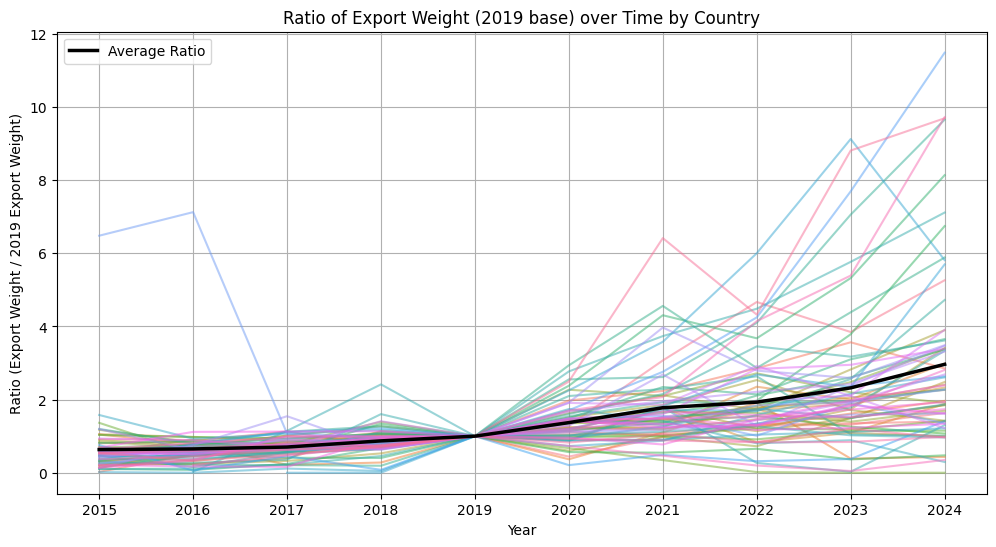

In [35]:
#### transposed_df 데이터셋에 있는 2015 부터 2024까지 컬럼에 대한 것을 X축으로 하여 선그래프를 그려주고 중심 혹은 평균선을 굳게 해서 표현해줘

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean ratio across all countries for each year
mean_ratio = transposed_df.mean()

# Prepare data for seaborn lineplot by melting the transposed DataFrame
# We need to reset index to make 'statCd' and 'statCdCntnKor1' columns
transposed_reset = transposed_df.reset_index()

# Melt the DataFrame to long-form for seaborn
melted_df = transposed_reset.melt(id_vars=['statCd', 'statCdCntnKor1'], var_name='year', value_name='ratio_expWgt_2019b')

# Convert 'year' column to numeric for proper plotting
melted_df['year'] = pd.to_numeric(melted_df['year'])

# Plot the line graph for each country
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_df, x='year', y='ratio_expWgt_2019b', hue='statCd', legend=False, alpha=0.5) # Plot individual lines

# Plot the mean line
sns.lineplot(x=mean_ratio.index, y=mean_ratio.values, color='black', linewidth=2.5, label='Average Ratio')

plt.title('Ratio of Export Weight (2019 base) over Time by Country')
plt.xlabel('Year')
plt.ylabel('Ratio (Export Weight / 2019 Export Weight)')
plt.xticks(mean_ratio.index)
plt.legend()
plt.grid(True)
plt.show()

In [39]:
#### transposed_df 데이터셋을 kor_ramen_expratio_15_24 파일명의 csv파일로
## '/content/drive/MyDrive/AI와무역투자론/Data' 위치에 저장하되, 한글이 깨지는 현상이 없도록 해줘.


from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the directory path and filename
directory_path = '/content/drive/MyDrive/AI와무역투자론/Data'
filename = 'kor_ramen_expratio_15_24.csv'
file_path = os.path.join(directory_path, filename)

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)

# Save the DataFrame to CSV with UTF-8 encoding to handle Korean characters
transposed_df_cleaned.to_csv(file_path, encoding='utf-8-sig')

print(f"DataFrame saved to {file_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame saved to /content/drive/MyDrive/AI와무역투자론/Data/kor_ramen_expratio_15_24.csv
